In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('../encodings/faces_all_simulation.txt')

In [2]:
# Split the dataset into features and labels
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 128].values

In [3]:
# Split the data into train set and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
# Normalize all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
# Training the classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a)*np.linalg.norm(b))

#classifier = DecisionTreeClassifier(criterion='entropy')
#classifier = KNeighborsClassifier(n_neighbors=5, metric=cosine_similarity)
classifier = KNeighborsClassifier(n_neighbors=5)
#classifier = SVC(kernel='linear', C=0.025)
#classifier = GaussianNB()
#classifier = SVC(kernel='rbf', C=0.2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [6]:
# Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0

In [11]:
# Compare error rate with K value
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error rate')

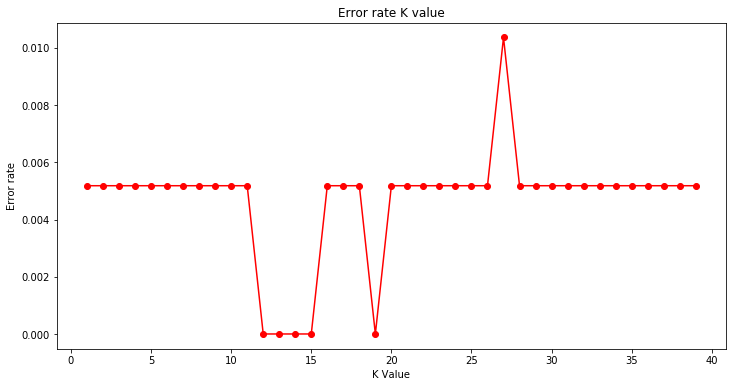

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', marker='o')
plt.title('Error rate K value')
plt.xlabel('K Value')
plt.ylabel('Error rate')

We observe that using cosine similarity as a metric yields us very bad results.